<a href="https://colab.research.google.com/github/pv21287/CE888/blob/master/leb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
	
from sklearn.metrics import balanced_accuracy_score as bacc  
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
df1 = df.dropna() #dropping rows with na values
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df[['y']] = df[["y"]].apply(LabelEncoder().fit_transform)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:

features =['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']


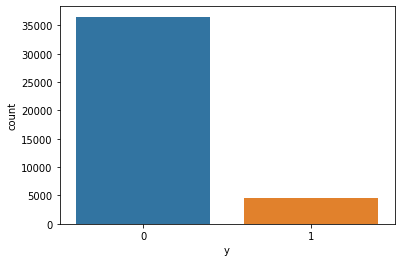

In [ ]:
sns.countplot(x="y", data=df)
plt.show()


In [ ]:
#calculating the difference of imbalance of Y
total = df['y'].value_counts()
(total[1]/(total[0]+total[1]))*1000

112.65417111780131

In [ ]:


X = df.drop('y', axis=1)
Y = df['y']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)
#X_train[:,3]

In [ ]:
total_train = y_train.value_counts()
total_test = y_test.value_counts()
perc_train = (total_train[1]/(total_train[0]+total_train[1]))*100
perc_test = (total_test[1]/(total_test[0]+total_test[1]))*100

print(perc_test, perc_train)

11.264870114105365 11.265553869499241


In [ ]:
fold = 10
trees = 100
depth = 3

clf = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=50)
scores = cross_val_score(clf, X_train, y_train, cv=fold, scoring='accuracy')
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.90 +/- 0.00


In [ ]:
dummy_clf = DummyClassifier(strategy = 'stratified',random_state=50)
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=fold, scoring='accuracy')

#dummy_scores
print("Dummy ACC: %.2f +/- %.2f"  % (dummy_scores.mean(), dummy_scores.std()))

Dummy ACC: 0.79 +/- 0.00


In [ ]:
print('Parameters currently in use:\n')
print(clf.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 50, 'verbose': 0, 'warm_start': False}


In [ ]:

param_grid = {

    'max_depth': [3,6,12,15],
    'n_estimators': [100, 200, 300, 1000]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid= param_grid, scoring = 'accuracy', n_jobs=-1, cv=10)

In [ ]:

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_acc = grid_search.best_score_
best_param = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_acc*100))
print("Best Parameters:", best_param)

AttributeError: ignored

In [ ]:
importances = grid_search.best_estimator_.feature_importances_

#newlist = [x for x in fruits if "a" in x]
indices = np.argsort(importances)[-3:]
values = [importances[i] for i in indices]


#X_train[indices[0]]
print(values)

In [ ]:

# Print the feature ranking
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]],  importances[indices[f]]))
#df.columns[pos]

In [ ]:

#df.columns.values.tolist()[indices[0]]
#len(indices)
test_clf =RandomForestClassifier(n_estimators=300, max_depth=12, random_state=50)
test_clf.fit(X_train,y_train)
acc_score = round(accuracy_score(y_test,test_clf.predict(X_test)),3)
acc_score = acc_score*100

In [ ]:

print("%f" % acc_score)

quiz 1


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

In [ ]:

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

In [ ]:
param_grid = {

    'max_depth': [10],
    'n_estimators': [1000]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid= param_grid, scoring = 'accuracy', n_jobs=-1, cv=10)


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_acc = grid_search.best_score_
best_param = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_acc*100))
print("Best Parameters:", best_param)

In [ ]:
importances = grid_search.best_estimator_.feature_importances_

#newlist = [x for x in fruits if "a" in x]
indices = np.argsort(importances)[-3:]
values = [importances[i] for i in indices]


#X_train[indices[0]]
print(values)

In [ ]:

# Print the feature ranking
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]],  importances[indices[f]]))
#df.columns[pos]

quiz 2


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=50)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

In [ ]:
dummy_clf = DummyClassifier(strategy = 'stratified')
dummy_scores = cross_val_score(dummy_clf, X_train, y_train,  scoring= make_scorer(f1_score))

#dummy_scores
print("Dummy ACC: %.2f +/- %.2f"  % (dummy_scores.mean(), dummy_scores.std()))

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=50)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

quiz 3


In [ ]:

X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=60)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

In [ ]:

X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=250, max_depth=6, random_state=60)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.28 +/- 0.05


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=50,stratify=Y)

clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=60)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1: 0.28 +/- 0.04
